In [1]:
from sportsipy.nfl.boxscore import Boxscores, Boxscore
from sportsipy.nfl.schedule import Schedule, Game
from sportsipy.nfl.teams import Teams
from pathlib import Path
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
# The game_Data function is extracting game statistics for each game. It loops through each game and each week grabbing the statistics referenced.
# This function creates the foundation for our final dataset.
def game_data(game_df,game_stats):
    try:
        # Creates a dataframe for the away_team and the home_team. Sets column names to be exact matches between the two.
        away_team_df = game_df[['away_name', 'away_abbr', 'away_score']].rename(columns = {'away_name': 'team_name', 'away_abbr': 'team_abbr', 'away_score': 'score'})
        home_team_df = game_df[['home_name','home_abbr', 'home_score']].rename(columns = {'home_name': 'team_name', 'home_abbr': 'team_abbr', 'home_score': 'score'})
        try:
            if game_df.loc[0,'away_score'] > game_df.loc[0,'home_score']:
                away_team_df = pd.merge(away_team_df, pd.DataFrame({'game_won' : [1], 'game_lost' : [0]}),left_index = True, right_index = True)
                home_team_df = pd.merge(home_team_df, pd.DataFrame({'game_won' : [0], 'game_lost' : [1]}),left_index = True, right_index = True)
            elif game_df.loc[0,'away_score'] < game_df.loc[0,'home_score']:
                away_team_df = pd.merge(away_team_df, pd.DataFrame({'game_won' : [0], 'game_lost' : [1]}),left_index = True, right_index = True)
                home_team_df = pd.merge(home_team_df, pd.DataFrame({'game_won' : [1], 'game_lost' : [0]}),left_index = True, right_index = True)
            else: 
                away_team_df = pd.merge(away_team_df, pd.DataFrame({'game_won' : [0], 'game_lost' : [0]}),left_index = True, right_index = True)
                home_team_df = pd.merge(home_team_df, pd.DataFrame({'game_won' : [0], 'game_lost' : [0]}),left_index = True, right_index = True)
        except TypeError:
                away_team_df = pd.merge(away_team_df, pd.DataFrame({'game_won' : [np.nan], 'game_lost' : [np.nan]}),left_index = True, right_index = True)
                home_team_df = pd.merge(home_team_df, pd.DataFrame({'game_won' : [np.nan], 'game_lost' : [np.nan]}),left_index = True, right_index = True)        

        # Creating the away_team & home_team stats dataframe. Grabbing the selected stats and then renaming them to match home == away dataframe column names.
        away_stats_df = game_stats.dataframe[['away_first_downs', 'away_fourth_down_attempts',
               'away_fourth_down_conversions', 'away_fumbles', 'away_fumbles_lost',
               'away_interceptions', 'away_net_pass_yards', 'away_pass_attempts',
               'away_pass_completions', 'away_pass_touchdowns', 'away_pass_yards',
               'away_penalties', 'away_points', 'away_rush_attempts',
               'away_rush_touchdowns', 'away_rush_yards', 'away_third_down_attempts',
               'away_third_down_conversions', 'away_time_of_possession',
               'away_times_sacked', 'away_total_yards', 'away_turnovers',
               'away_yards_from_penalties', 'away_yards_lost_from_sacks']].reset_index().drop(columns ='index').rename(columns = {
               'away_first_downs': 'first_downs', 'away_fourth_down_attempts':'fourth_down_attempts',
               'away_fourth_down_conversions':'fourth_down_conversions' , 'away_fumbles': 'fumbles', 'away_fumbles_lost': 'fumbles_lost',
               'away_interceptions': 'interceptions', 'away_net_pass_yards':'net_pass_yards' , 'away_pass_attempts': 'pass_attempts',
               'away_pass_completions':'pass_completions' , 'away_pass_touchdowns': 'pass_touchdowns', 'away_pass_yards': 'pass_yards',
               'away_penalties': 'penalties', 'away_points': 'points', 'away_rush_attempts': 'rush_attempts',
               'away_rush_touchdowns': 'rush_touchdowns', 'away_rush_yards': 'rush_yards', 'away_third_down_attempts': 'third_down_attempts',
               'away_third_down_conversions': 'third_down_conversions', 'away_time_of_possession': 'time_of_possession',
               'away_times_sacked': 'times_sacked', 'away_total_yards': 'total_yards', 'away_turnovers': 'turnovers',
               'away_yards_from_penalties':'yards_from_penalties', 'away_yards_lost_from_sacks': 'yards_lost_from_sacks'})

        home_stats_df = game_stats.dataframe[['home_first_downs', 'home_fourth_down_attempts',
               'home_fourth_down_conversions', 'home_fumbles', 'home_fumbles_lost',
               'home_interceptions', 'home_net_pass_yards', 'home_pass_attempts',
               'home_pass_completions', 'home_pass_touchdowns', 'home_pass_yards',
               'home_penalties', 'home_points', 'home_rush_attempts',
               'home_rush_touchdowns', 'home_rush_yards', 'home_third_down_attempts',
               'home_third_down_conversions', 'home_time_of_possession',
               'home_times_sacked', 'home_total_yards', 'home_turnovers',
               'home_yards_from_penalties', 'home_yards_lost_from_sacks']].reset_index().drop(columns = 'index').rename(columns = {
               'home_first_downs': 'first_downs', 'home_fourth_down_attempts':'fourth_down_attempts',
               'home_fourth_down_conversions':'fourth_down_conversions' , 'home_fumbles': 'fumbles', 'home_fumbles_lost': 'fumbles_lost',
               'home_interceptions': 'interceptions', 'home_net_pass_yards':'net_pass_yards' , 'home_pass_attempts': 'pass_attempts',
               'home_pass_completions':'pass_completions' , 'home_pass_touchdowns': 'pass_touchdowns', 'home_pass_yards': 'pass_yards',
               'home_penalties': 'penalties', 'home_points': 'points', 'home_rush_attempts': 'rush_attempts',
               'home_rush_touchdowns': 'rush_touchdowns', 'home_rush_yards': 'rush_yards', 'home_third_down_attempts': 'third_down_attempts',
               'home_third_down_conversions': 'third_down_conversions', 'home_time_of_possession': 'time_of_possession',
               'home_times_sacked': 'times_sacked', 'home_total_yards': 'total_yards', 'home_turnovers': 'turnovers',
               'home_yards_from_penalties':'yards_from_penalties', 'home_yards_lost_from_sacks': 'yards_lost_from_sacks'})
        
        # Merge the team_df & stats_df for both home & away teams. Set the left_index & right_index to True so that both dataframes merge on the same indices. 
        away_team_df = pd.merge(away_team_df, away_stats_df,left_index = True, right_index = True)
        home_team_df = pd.merge(home_team_df, home_stats_df,left_index = True, right_index = True)
        try:
            # Converting time_of_possession from MM:SS format into seconds(int). 
            away_team_df['time_of_possession'] = (int(away_team_df['time_of_possession'].loc[0][0:2]) * 60) + int(away_team_df['time_of_possession'].loc[0][3:5])
            home_team_df['time_of_possession'] = (int(home_team_df['time_of_possession'].loc[0][0:2]) * 60) + int(home_team_df['time_of_possession'].loc[0][3:5])
        except TypeError:
            away_team_df['time_of_possession'] = np.nan
            home_team_df['time_of_possession'] = np.nan
    except TypeError:
        away_team_df = pd.DataFrame()
        home_team_df = pd.DataFrame()
    return away_team_df, home_team_df


def game_data_up_to_week(weeks,year):
    weeks_games_df = pd.DataFrame()
    for w in range(len(weeks)):
        date_string = str(weeks[w]) + '-' + str(year)
        week_scores = Boxscores(weeks[w],year)
        week_games_df = pd.DataFrame()
        for g in range(len(week_scores.games[date_string])):
            game_str = week_scores.games[date_string][g]['boxscore']
            game_stats = Boxscore(game_str)
            game_df = pd.DataFrame(week_scores.games[date_string][g], index = [0])
            away_team_df, home_team_df = game_data(game_df,game_stats)
            away_team_df['week'] = weeks[w]
            home_team_df['week'] = weeks[w]
            week_games_df = pd.concat([week_games_df,away_team_df])
            week_games_df = pd.concat([week_games_df,home_team_df])
        weeks_games_df = pd.concat([weeks_games_df,week_games_df])
    return weeks_games_df

def get_schedule(year):
    weeks = list(range(1,19))
    schedule_df = pd.DataFrame()
    for w in range(len(weeks)):
        date_string = str(weeks[w]) + '-' + str(year)
        week_scores = Boxscores(weeks[w],year)
        week_games_df = pd.DataFrame()
        for g in range(len(week_scores.games[date_string])):
            game = pd.DataFrame(week_scores.games[date_string][g], index = [0])[['away_name', 'away_abbr','home_name', 'home_abbr','winning_name', 'winning_abbr' ]]
            game['week'] = weeks[w]
            week_games_df = pd.concat([week_games_df,game])
        schedule_df = pd.concat([schedule_df, week_games_df]).reset_index().drop(columns = 'index') 
    return schedule_df 

def agg_weekly_data(schedule_df,weeks_games_df,current_week,weeks):
    schedule_df = schedule_df[schedule_df.week < current_week]
    agg_games_df = pd.DataFrame()
    for w in range(1,len(weeks)):
        games_df = schedule_df[schedule_df.week == weeks[w]]
        agg_weekly_df = weeks_games_df[weeks_games_df.week < weeks[w]].drop(columns = ['score','week','game_won', 'game_lost']).groupby(by=["team_name", "team_abbr"]).mean().reset_index()
        win_loss_df = weeks_games_df[weeks_games_df.week < weeks[w]][["team_name", "team_abbr",'game_won', 'game_lost']].groupby(by=["team_name", "team_abbr"]).sum().reset_index()
        win_loss_df['win_perc'] = win_loss_df['game_won'] / (win_loss_df['game_won'] + win_loss_df['game_lost'])
        win_loss_df = win_loss_df.drop(columns = ['game_won', 'game_lost'])

        try:
            agg_weekly_df['fourth_down_perc'] = agg_weekly_df['fourth_down_conversions'] / agg_weekly_df['fourth_down_attempts']  
        except ZeroDivisionError:
            agg_weekly_df['fourth_down_perc'] = 0 
        agg_weekly_df['fourth_down_perc'] = agg_weekly_df['fourth_down_perc'].fillna(0)

        try:
            agg_weekly_df['third_down_perc'] = agg_weekly_df['third_down_conversions'] / agg_weekly_df['third_down_attempts']  
        except ZeroDivisionError:
            agg_weekly_df['third_down_perc'] = 0
        agg_weekly_df['third_down_perc'] = agg_weekly_df['third_down_perc'].fillna(0)  

        agg_weekly_df = agg_weekly_df.drop(columns = ['fourth_down_attempts', 'fourth_down_conversions', 'third_down_attempts', 'third_down_conversions'])
        agg_weekly_df = pd.merge(win_loss_df,agg_weekly_df,left_on = ['team_name', 'team_abbr'], right_on = ['team_name', 'team_abbr'])

        away_df = pd.merge(games_df,agg_weekly_df,how = 'inner', left_on = ['away_name', 'away_abbr'], right_on = ['team_name', 'team_abbr']).drop(columns = ['team_name', 'team_abbr']).rename(columns = {
                'win_perc': 'away_win_perc',
               'first_downs': 'away_first_downs', 'fumbles': 'away_fumbles', 'fumbles_lost':'away_fumbles_lost', 'interceptions':'away_interceptions',
               'net_pass_yards': 'away_net_pass_yards', 'pass_attempts':'away_pass_attempts', 'pass_completions':'away_pass_completions',
               'pass_touchdowns':'away_pass_touchdowns', 'pass_yards':'away_pass_yards', 'penalties':'away_penalties', 'points':'away_points', 'rush_attempts':'away_rush_attempts',
               'rush_touchdowns':'away_rush_touchdowns', 'rush_yards':'away_rush_yards', 'time_of_possession':'away_time_of_possession', 'times_sacked':'away_times_sacked',
               'total_yards':'away_total_yards', 'turnovers':'away_turnovers', 'yards_from_penalties':'away_yards_from_penalties',
               'yards_lost_from_sacks': 'away_yards_lost_from_sacks', 'fourth_down_perc':'away_fourth_down_perc', 'third_down_perc':'away_third_down_perc'})

        home_df = pd.merge(games_df,agg_weekly_df,how = 'inner', left_on = ['home_name', 'home_abbr'], right_on = ['team_name', 'team_abbr']).drop(columns = ['team_name', 'team_abbr']).rename(columns = {
                'win_perc': 'home_win_perc',
               'first_downs': 'home_first_downs', 'fumbles': 'home_fumbles', 'fumbles_lost':'home_fumbles_lost', 'interceptions':'home_interceptions',
               'net_pass_yards': 'home_net_pass_yards', 'pass_attempts':'home_pass_attempts', 'pass_completions':'home_pass_completions',
               'pass_touchdowns':'home_pass_touchdowns', 'pass_yards':'home_pass_yards', 'penalties':'home_penalties', 'points':'home_points', 'rush_attempts':'home_rush_attempts',
               'rush_touchdowns':'home_rush_touchdowns', 'rush_yards':'home_rush_yards', 'time_of_possession':'home_time_of_possession', 'times_sacked':'home_times_sacked',
               'total_yards':'home_total_yards', 'turnovers':'home_turnovers', 'yards_from_penalties':'home_yards_from_penalties',
               'yards_lost_from_sacks': 'home_yards_lost_from_sacks', 'fourth_down_perc':'home_fourth_down_perc', 'third_down_perc':'home_third_down_perc'})

        agg_weekly_df = pd.merge(away_df,home_df,left_on = ['away_name', 'away_abbr', 'home_name', 'home_abbr', 'winning_name',
               'winning_abbr', 'week'], right_on = ['away_name', 'away_abbr', 'home_name', 'home_abbr', 'winning_name',
               'winning_abbr', 'week'])

        agg_weekly_df['win_perc_dif'] = agg_weekly_df['away_win_perc'] - agg_weekly_df['home_win_perc']
        agg_weekly_df['first_downs_dif'] = agg_weekly_df['away_first_downs'] - agg_weekly_df['home_first_downs']
        agg_weekly_df['fumbles_dif'] = agg_weekly_df['away_fumbles'] - agg_weekly_df['home_fumbles']
        agg_weekly_df['interceptions_dif'] = agg_weekly_df['away_interceptions'] - agg_weekly_df['home_interceptions']
        agg_weekly_df['net_pass_yards_dif'] = agg_weekly_df['away_net_pass_yards'] - agg_weekly_df['home_net_pass_yards']
        agg_weekly_df['pass_attempts_dif'] = agg_weekly_df['away_pass_attempts'] - agg_weekly_df['home_pass_attempts']
        agg_weekly_df['pass_completions_dif'] = agg_weekly_df['away_pass_completions'] - agg_weekly_df['home_pass_completions']
        agg_weekly_df['pass_touchdowns_dif'] = agg_weekly_df['away_pass_touchdowns'] - agg_weekly_df['home_pass_touchdowns']
        agg_weekly_df['pass_yards_dif'] = agg_weekly_df['away_pass_yards'] - agg_weekly_df['home_pass_yards']
        agg_weekly_df['penalties_dif'] = agg_weekly_df['away_penalties'] - agg_weekly_df['home_penalties']
        agg_weekly_df['points_dif'] = agg_weekly_df['away_points'] - agg_weekly_df['home_points']
        agg_weekly_df['rush_attempts_dif'] = agg_weekly_df['away_rush_attempts'] - agg_weekly_df['home_rush_attempts']
        agg_weekly_df['rush_touchdowns_dif'] = agg_weekly_df['away_rush_touchdowns'] - agg_weekly_df['home_rush_touchdowns']
        agg_weekly_df['rush_yards_dif'] = agg_weekly_df['away_rush_yards'] - agg_weekly_df['home_rush_yards']
        agg_weekly_df['time_of_possession_dif'] = agg_weekly_df['away_time_of_possession'] - agg_weekly_df['home_time_of_possession']
        agg_weekly_df['times_sacked_dif'] = agg_weekly_df['away_times_sacked'] - agg_weekly_df['home_times_sacked']
        agg_weekly_df['total_yards_dif'] = agg_weekly_df['away_total_yards'] - agg_weekly_df['home_total_yards']
        agg_weekly_df['turnovers_dif'] = agg_weekly_df['away_turnovers'] - agg_weekly_df['home_turnovers']
        agg_weekly_df['yards_from_penalties_dif'] = agg_weekly_df['away_yards_from_penalties'] - agg_weekly_df['home_yards_from_penalties']
        agg_weekly_df['yards_lost_from_sacks_dif'] = agg_weekly_df['away_yards_lost_from_sacks'] - agg_weekly_df['home_yards_lost_from_sacks']
        agg_weekly_df['fourth_down_perc_dif'] = agg_weekly_df['away_fourth_down_perc'] - agg_weekly_df['home_fourth_down_perc']
        agg_weekly_df['third_down_perc_dif'] = agg_weekly_df['away_third_down_perc'] - agg_weekly_df['home_third_down_perc']

        agg_weekly_df = agg_weekly_df.drop(columns = ['away_win_perc',
               'away_first_downs', 'away_fumbles', 'away_fumbles_lost', 'away_interceptions',
               'away_net_pass_yards', 'away_pass_attempts','away_pass_completions',
               'away_pass_touchdowns', 'away_pass_yards', 'away_penalties', 'away_points', 'away_rush_attempts',
               'away_rush_touchdowns', 'away_rush_yards', 'away_time_of_possession', 'away_times_sacked',
               'away_total_yards', 'away_turnovers', 'away_yards_from_penalties',
               'away_yards_lost_from_sacks','away_fourth_down_perc', 'away_third_down_perc','home_win_perc',
               'home_first_downs', 'home_fumbles', 'home_fumbles_lost', 'home_interceptions',
               'home_net_pass_yards', 'home_pass_attempts','home_pass_completions',
               'home_pass_touchdowns', 'home_pass_yards', 'home_penalties', 'home_points', 'home_rush_attempts',
               'home_rush_touchdowns', 'home_rush_yards', 'home_time_of_possession', 'home_times_sacked',
               'home_total_yards', 'home_turnovers', 'home_yards_from_penalties',
               'home_yards_lost_from_sacks','home_fourth_down_perc', 'home_third_down_perc'])
        
        if (agg_weekly_df['winning_name'].isnull().values.any() and weeks[w] > 3):
            agg_weekly_df['result'] = np.nan
            print(f"Week {weeks[w]} games have not finished yet.")
        else:
            agg_weekly_df['result'] = agg_weekly_df['winning_name'] == agg_weekly_df['away_name']
            agg_weekly_df['result'] = agg_weekly_df['result'].astype('float')
        agg_weekly_df = agg_weekly_df.drop(columns = ['winning_name', 'winning_abbr'])
        agg_games_df = pd.concat([agg_games_df, agg_weekly_df])
    agg_games_df = agg_games_df.reset_index().drop(columns = 'index')
    # What is .drop(index = 20) doing?
    agg_games_df = agg_games_df.drop(index = 20, axis=0)
    return agg_games_df

def get_elo():
    elo_df = pd.read_csv('https://projects.fivethirtyeight.com/nfl-api/nfl_elo_latest.csv')
    elo_df = elo_df.drop(columns = ['season','neutral' ,'playoff', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
           'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2',
           'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post',
           'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'quality', 'importance', 'total_rating'])
    elo_df.date = pd.to_datetime(elo_df.date)
    elo_df = elo_df[elo_df.date < '01-05-2022']

    elo_df['team1'] = elo_df['team1'].replace(['KC', 'JAX', 'CAR', 'BAL', 'BUF', 'MIN', 'DET', 'ATL', 'NE', 'WSH',
           'CIN', 'NO', 'SF', 'LAR', 'NYG', 'DEN', 'CLE', 'IND', 'TEN', 'NYJ',
           'TB', 'MIA', 'PIT', 'PHI', 'GB', 'CHI', 'DAL', 'ARI', 'LAC', 'HOU',
           'SEA', 'OAK'],
            ['kan','jax','car', 'rav', 'buf', 'min', 'det', 'atl', 'nwe', 'was', 
            'cin', 'nor', 'sfo', 'ram', 'nyg', 'den', 'cle', 'clt', 'oti', 'nyj', 
             'tam','mia', 'pit', 'phi', 'gnb', 'chi', 'dal', 'crd', 'sdg', 'htx', 'sea', 'rai' ])
    elo_df['team2'] = elo_df['team2'].replace(['KC', 'JAX', 'CAR', 'BAL', 'BUF', 'MIN', 'DET', 'ATL', 'NE', 'WSH',
           'CIN', 'NO', 'SF', 'LAR', 'NYG', 'DEN', 'CLE', 'IND', 'TEN', 'NYJ',
           'TB', 'MIA', 'PIT', 'PHI', 'GB', 'CHI', 'DAL', 'ARI', 'LAC', 'HOU',
           'SEA', 'OAK'],
            ['kan','jax','car', 'rav', 'buf', 'min', 'det', 'atl', 'nwe', 'was', 
            'cin', 'nor', 'sfo', 'ram', 'nyg', 'den', 'cle', 'clt', 'oti', 'nyj', 
             'tam','mia', 'pit', 'phi', 'gnb', 'chi', 'dal', 'crd', 'sdg', 'htx', 'sea', 'rai' ])
    return elo_df

def merge_rankings(agg_games_df,elo_df):
    agg_games_df = pd.merge(agg_games_df, elo_df, how = 'inner', left_on = ['home_abbr', 'away_abbr'], right_on = ['team1', 'team2']).drop(columns = ['date','team1', 'team2'])
    agg_games_df['elo_dif'] = agg_games_df['elo2_pre'] - agg_games_df['elo1_pre']
    agg_games_df['qb_dif'] = agg_games_df['qb2_value_pre'] - agg_games_df['qb1_value_pre']
    agg_games_df = agg_games_df.drop(columns = ['elo1_pre', 'elo2_pre', 'qb1_value_pre', 'qb2_value_pre'])
    return agg_games_df

# def prep_test_train(current_week,weeks,year):
#     current_week = current_week + 1
#     schedule_df  = get_schedule(year)
#     weeks_games_df = game_data_up_to_week(weeks,year)
#     agg_games_df = agg_weekly_data(schedule_df,weeks_games_df,current_week,weeks)
#     elo_df = get_elo()
#     agg_games_df = merge_rankings(agg_games_df, elo_df)
#     train_df = agg_games_df[agg_games_df.result.notna()]
#     current_week = current_week - 1
#     test_df = agg_games_df[agg_games_df.week == current_week]
#     return test_df, train_df

def prep_test_train(current_week,weeks,year):
    current_week = current_week + 1
    schedule_df  = get_schedule(year)
    weeks_games_df = game_data_up_to_week(weeks,year)
    agg_games_df = agg_weekly_data(schedule_df,weeks_games_df,current_week,weeks)
    elo_df = get_elo()
    agg_games_df = merge_rankings(agg_games_df, elo_df)
    train_df = agg_games_df[agg_games_df.result.notna()]
    current_week = current_week - 1
    test_df = agg_games_df[agg_games_df.week == current_week]
    return test_df, train_df

def display(y_pred,X_test):
    for g in range(len(y_pred)):
        win_prob = round(y_pred[g],2)
        away_team = X_test.reset_index().drop(columns = 'index').loc[g,'away_name']
        home_team = X_test.reset_index().drop(columns = 'index').loc[g,'home_name']
        print(f'The {away_team} have a probability of {win_prob} of beating the {home_team}.')
    

In [3]:
#game = game_data_up_to_week(range(1,4),2021)
#game


In [5]:
current_week = 12
weeks = list(range(1,current_week + 1))
year = 2021

pred_games_df, comp_games_df = prep_test_train(current_week,weeks,year)


Week 10 games have not finished yet.


In [9]:
#removing last weeks results from completed weeks results

comp_games_df = comp_games_df[comp_games_df['week'] < current_week]

In [11]:
pred_games_df

,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,pass_attempts_dif,pass_completions_dif,pass_touchdowns_dif,pass_yards_dif,penalties_dif,points_dif,rush_attempts_dif,rush_touchdowns_dif,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result,elo_dif,qb_dif
148,Chicago Bears,chi,Detroit Lions,det,12,0.300000,-1.600000,0.500000,0.100000,-42.000000,-8.700000,-7.300000,-0.100000,-37.100000,-0.400000,0.300000,4.100000,0.000000,17.900000,-20.600000,0.900000,-24.100000,0.100000,0.500000,4.900000,-7.763975e-02,0.010196,1.0,146.190723,1.927580
149,Las Vegas Raiders,rai,Dallas Cowboys,dal,12,-0.200000,-4.300000,-0.300000,0.100000,5.300000,-0.100000,-0.500000,-0.600000,8.100000,-0.200000,-7.000000,-6.200000,-0.100000,-50.100000,-113.400000,0.300000,-44.800000,-0.300000,2.500000,2.800000,-9.049774e-03,-0.086816,1.0,-95.585615,-39.040283
150,Buffalo Bills,buf,New Orleans Saints,nor,12,0.100000,3.300000,0.900000,0.300000,69.900000,7.700000,7.200000,-0.100000,69.300000,1.400000,4.400000,-3.400000,0.300000,0.900000,43.700000,-0.200000,70.800000,0.300000,15.100000,-0.600000,-2.833333e-01,0.104856,1.0,22.731979,131.385591
151,Philadelphia Eagles,phi,New York Giants,nyg,12,0.154545,1.336364,-0.127273,-0.445455,-30.445455,-6.636364,-5.009091,0.181818,-35.063636,0.709091,8.100000,7.427273,0.845455,60.463636,8.845455,-0.381818,30.018182,-0.581818,4.772727,-4.618182,-1.041667e-01,0.087977,0.0,81.771113,66.528163
152,Tennessee Titans,oti,New England Patriots,nwe,12,0.090909,0.818182,-0.090909,0.363636,-10.454545,1.090909,-0.636364,-0.181818,-7.454545,0.818182,-0.818182,2.727273,0.272727,12.545455,116.181818,0.818182,2.272727,0.181818,7.909091,3.000000,-1.110223e-16,-0.052341,0.0,1.748849,34.094641
153,Carolina Panthers,car,Miami Dolphins,mia,12,0.090909,1.454545,-0.545455,0.181818,-29.909091,-4.363636,-4.363636,-0.363636,-33.727273,0.545455,2.272727,6.181818,0.454545,38.181818,158.272727,-0.090909,8.272727,-0.181818,7.181818,-3.818182,-5.128205e-03,-0.066259,0.0,-20.287118,4.685944
154,Atlanta Falcons,atl,Jacksonville Jaguars,jax,12,0.200000,0.300000,-0.100000,0.400000,22.800000,0.500000,2.900000,0.700000,27.200000,-1.100000,1.900000,0.300000,-0.600000,-33.900000,99.100000,0.100000,-11.100000,0.000000,-6.000000,4.400000,-2.539683e-01,0.067949,1.0,110.954114,49.078212
155,New York Jets,nyj,Houston Texans,htx,12,0.000000,5.100000,-0.400000,0.700000,64.200000,7.800000,3.900000,0.500000,67.300000,-0.100000,2.800000,-3.300000,0.000000,2.400000,56.000000,0.100000,66.600000,0.600000,-4.700000,3.100000,-1.987179e-01,0.045072,1.0,-79.548074,-69.152856
156,Tampa Bay Buccaneers,tam,Indianapolis Colts,clt,12,0.154545,2.181818,-0.281818,0.436364,98.709091,10.563636,8.645455,1.263636,96.309091,2.463636,2.809091,-6.736364,-0.654545,-56.709091,-76.818182,-0.336364,42.000000,0.390909,23.745455,-2.400000,-1.704545e-02,0.067271,1.0,24.205015,106.468295
157,Pittsburgh Steelers,pit,Cincinnati Bengals,cin,12,-0.044444,0.700000,0.100000,-0.600000,-13.500000,7.500000,3.600000,-0.800000,-20.300000,2.600000,-5.400000,-1.900000,-0.300000,-12.600000,2.900000,-0.700000,-26.100000,-0.300000,12.800000,-6.800000,-2.307692e-01,0.020332,0.0,-4.727868,38.577019


In [13]:
comp_games_df

,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,pass_attempts_dif,pass_completions_dif,pass_touchdowns_dif,pass_yards_dif,penalties_dif,points_dif,rush_attempts_dif,rush_touchdowns_dif,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result,elo_dif,qb_dif
0,New York Giants,nyg,Washington Football Team,was,2,0.000000,4.000000,-2.000000,0.000000,121.000000,16.000000,8.000000,0.000000,132.000000,-4.000000,-3.000000,-7.000000,1.000000,-66.000000,55.000000,1.000000,55.000000,0.000000,-9.000000,11.000000,-0.666667,0.200000,0.0,-50.848658,100.316973
1,Cincinnati Bengals,cin,Chicago Bears,chi,2,1.000000,-4.000000,-1.000000,-1.000000,29.000000,-13.000000,-9.000000,2.000000,45.000000,0.000000,13.000000,10.000000,-1.000000,15.000000,-23.000000,2.000000,44.000000,-2.000000,-20.000000,16.000000,0.666667,-0.240260,0.0,-51.742731,34.616025
2,New Orleans Saints,nor,Carolina Panthers,car,2,0.000000,4.000000,-1.000000,0.000000,-119.000000,-14.000000,-9.000000,4.000000,-128.000000,0.000000,19.000000,12.000000,-1.000000,60.000000,196.000000,-1.000000,-59.000000,-1.000000,-2.000000,-9.000000,1.000000,0.214286,0.0,204.627654,54.983874
3,Las Vegas Raiders,rai,Pittsburgh Steelers,pit,2,0.000000,10.000000,0.000000,1.000000,232.000000,24.000000,16.000000,1.000000,247.000000,5.000000,10.000000,0.000000,2.000000,7.000000,445.000000,1.000000,239.000000,1.000000,30.000000,15.000000,0.000000,0.133333,1.0,-62.282436,-14.386838
4,San Francisco 49ers,sfo,Philadelphia Eagles,phi,2,0.000000,-3.000000,0.000000,0.000000,50.000000,-9.000000,-9.000000,-1.000000,55.000000,-7.000000,9.000000,-3.000000,1.000000,-42.000000,-270.000000,0.000000,8.000000,2.000000,-10.000000,5.000000,0.000000,-0.128205,1.0,36.874709,-13.318243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Cincinnati Bengals,cin,Las Vegas Raiders,rai,11,0.000000,-1.777778,-0.333333,0.333333,-34.555556,-6.333333,-4.111111,0.666667,-30.000000,-3.222222,2.888889,2.000000,0.000000,12.111111,24.333333,0.555556,-22.444444,0.333333,-28.888889,4.555556,0.076923,0.010260,1.0,6.065577,-41.499542
144,Arizona Cardinals,crd,Seattle Seahawks,sea,11,0.466667,4.266667,1.022222,0.355556,47.255556,2.311111,3.155556,0.133333,41.322222,0.833333,8.588889,6.844444,0.822222,26.022222,319.611111,-0.822222,73.277778,0.433333,12.422222,-5.933333,0.466667,0.091837,1.0,75.434931,-53.283848
145,Dallas Cowboys,dal,Kansas City Chiefs,kan,11,0.177778,-1.122222,-0.144444,-0.333333,-0.766667,-6.011111,-2.633333,-0.055556,1.088889,1.288889,5.355556,5.711111,0.400000,29.055556,49.766667,-0.144444,28.288889,-0.666667,13.922222,1.855556,-0.165775,-0.076437,0.0,-93.812538,16.993555
146,Pittsburgh Steelers,pit,Los Angeles Chargers,sdg,11,0.069444,-3.111111,0.666667,-0.222222,-33.555556,-0.444444,-0.555556,-0.888889,-35.222222,-0.111111,-4.666667,2.333333,-0.222222,-5.555556,196.555556,0.222222,-39.111111,0.222222,-13.444444,-1.666667,-0.283422,-0.037022,0.0,12.663172,-34.675099


In [14]:
train_df = comp_games_df
test_df = pred_games_df

X_train = train_df.drop(columns = ['away_name', 'away_abbr', 'home_name', 'home_abbr', 'week','result'])
y_train = train_df[['result']] 
X_test = test_df.drop(columns = ['away_name', 'away_abbr', 'home_name', 'home_abbr', 'week','result'])
y_test = test_df[['result']]

## Random Forest Model

In [15]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = rf_model.predict(X_test)


#note: cannot print classification report for unfinished weeks as it contains NaN values
#print(classification_report(y_test, y_pred))

C:\Users\12063\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [16]:
y_pred

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [17]:
# Create dataframe to hold prediction results
results_df = test_df[['week','away_name','home_name']]
results_df['away_team_win_%'] = y_pred
results_df['home_team_win_%'] = 1 - results_df['away_team_win_%']
results_df['predicted_winner'] = 0

# Loop through results dataframe and add predicted_winner name to column
for index, row in results_df.iterrows():
    if results_df.loc[index,'away_team_win_%'] > results_df.loc[index,'home_team_win_%']:
        results_df.loc[index,'predicted_winner'] = results_df.loc[index,'away_name']
    else:
        results_df.loc[index,'predicted_winner'] = results_df.loc[index,'home_name']

# Set Index to the 'week' column
results_df=results_df.set_index('week')      

# Use get_schedule function to pull dataframe that shows actual weekly winners. Includes all weeks.
weekly_winner = get_schedule('2021')
weekly_winner = weekly_winner.drop(columns=['away_abbr','home_abbr','winning_abbr'])
weekly_winner = weekly_winner.rename(columns={'away_name':'ww_away_name','home_name':'ww_home_name'})

# Slices weekly_winner dataframe based on current week model is predicting.
current_week_wins = weekly_winner.loc[weekly_winner['week'] == current_week]
current_week_wins = current_week_wins.set_index('week')

# Sort both dataframes by away_name
results_df = results_df.sort_values(by='away_name')
current_week_wins = current_week_wins.sort_values(by='ww_away_name')

# Combine results & weekly_winner df's. Drop dupe columns and rename winning_name to 'actual_winner'
actual_results_df = (pd.concat([results_df,current_week_wins],axis=1)).drop(columns=['ww_away_name','ww_home_name']).rename(columns={'winning_name':'actual_winner'})

actual_results_df.to_csv('Week_12_predict.csv')


C:\Users\12063\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\12063\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\12063\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

## Random Forest Feature Importance

In [18]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

important_features = zip(test_df.columns,rf_model.feature_importances_)

important_features


In [19]:
# Create a dataframe of the important features
importances_df = pd.DataFrame(important_features)

# Rename the columns
importances_df = importances_df.rename(columns={0: 'Feature', 1: 'Importance'})

# Set the index
importances_df = importances_df.set_index('Feature')

# Sort the dataframe by feature importance
importances_df = importances_df.sort_values(by='Importance',ascending=False)

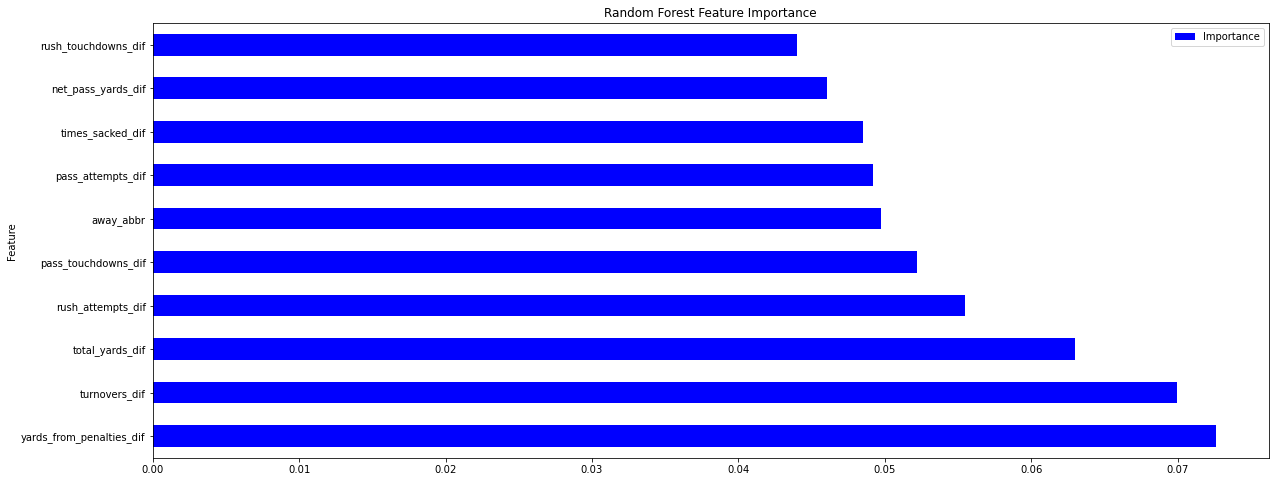

In [20]:
# Plot the top 10 most important features
importances_df[0:10].plot(
    kind='barh', 
    color='blue', 
    title= 'Random Forest Feature Importance', 
    figsize=[20, 8],
    legend=True)

import matplotlib.pyplot as plt

plt.savefig('RF_Feature_Importance_Week_11.png')

In [24]:
importances_df.head(40)

,Importance
Feature,
yards_from_penalties_dif,0.072587
turnovers_dif,0.069948
total_yards_dif,0.062996
rush_attempts_dif,0.055447
pass_touchdowns_dif,0.052198
away_abbr,0.049725
pass_attempts_dif,0.049177
times_sacked_dif,0.048481
net_pass_yards_dif,0.046056


## Accuracy Score

In [ ]:
# Export actual_results_df to csv based on the current_week predicted.
file_path = str(f'Exports/week_{current_week}_base_results.csv')
actual_results_df.to_csv(file_path)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,np.round(y_pred))

In [ ]:
# Create function to read all csvs back into file for final analysis.
# Attempted...
'''def read_csvs():
    weeks = range(4,14)
    final_df = pd.DataFrame()
    for week in weeks:
        csv_string = str(f'Exports/week_{weeks[week]}_base_results.csv')
        df = pd.read_csv('csv_string')
        final_df.append(df)
    return final_df'''
        

In [ ]:
# Read in all csvs
w4 = pd.read_csv(Path('Exports/week_4_base_results.csv'), index_col='week')
w5 = pd.read_csv(Path('Exports/week_5_base_results.csv'), index_col='week')
w6 = pd.read_csv(Path('Exports/week_6_base_results.csv'), index_col='week')
w7 = pd.read_csv(Path('Exports/week_7_base_results.csv'), index_col='week')
w8 = pd.read_csv(Path('Exports/week_8_base_results.csv'), index_col='week')
w9 = pd.read_csv(Path('Exports/week_9_base_results.csv'), index_col='week')
w10 = pd.read_csv(Path('Exports/week_10_base_results.csv'), index_col='week')
w11 = pd.read_csv(Path('Exports/week_11_base_results.csv'), index_col='week')
w12 = pd.read_csv(Path('Exports/week_12_base_results.csv'), index_col='week')
w13 = pd.read_csv(Path('Exports/week_13_base_results.csv'), index_col='week')

In [ ]:
# Combine csvs so far
season_results = pd.DataFrame()
season_results = season_results.append(w4)
season_results = season_results.append(w5)
season_results = season_results.append(w6)
season_results = season_results.append(w7)
season_results = season_results.append(w8)
season_results = season_results.append(w9)
season_results = season_results.append(w10)
season_results = season_results.append(w11)
season_results = season_results.append(w12)
season_results

In [ ]:
for index, row in season_results.iterrows():
    if season_results.loc[index,'predicted_winner'] == season_results.loc[index,'actual_winner']:
        season_results.loc[index,'correct_prediction'] = 1
    else:
        season_results.loc[index,'correct_prediction'] = 0